# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [36]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [38]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

In [39]:
def get_err(feas, labels, w):
    test_out = np.sign(np.dot(w.T, feas))
    test_out[test_out == 0] = -1
    mask = test_out == np.squeeze(labels)
    right_num = np.sum(mask)
    acc = right_num/feas.shape[1]
    return 1-acc

def normalize(X):
    mean = np.mean(X, axis=1)
    var = np.std(X, axis=1)
    var [var == 0] = 1
    X_norm = ((X.T - mean)/var).T
    return X_norm

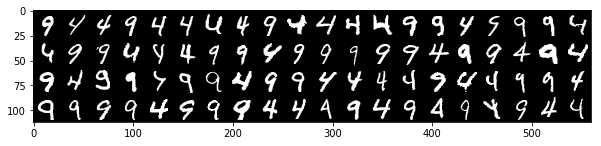

In [40]:
show_digit(X)
# Do feature normalization here
# begin answer
X_norm = normalize(X)
# end answer

In [42]:
# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3, 1e4]) # err of 100 and 1000 are both lowest, so add a 10000
lmbda = 0
E_val_min = float('inf')

from ridge import ridge

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        lx = np.insert(X_norm[:, j], 0, values=1)
        ly = y[:, j]
        
        X_ = np.delete(X_norm, j, axis=1)  # take point j out of X
        y_ = np.delete(y, j, axis=1)
        
        w = ridge(X_, y_, lmbdas[i])
        err = 0 if ly*np.dot(lx, w) > 0 else 1
        E_val = E_val + err
    # Update lmbda according validation error
    # begin answer
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = lmbdas[i]
    # end answer
    print("lambda:", lmbdas[i], ', err is', E_val)

lambda: 0.001 , err is 22
lambda: 0.01 , err is 22
lambda: 0.1 , err is 22
lambda: 0.0 , err is 22
lambda: 1.0 , err is 21
lambda: 10.0 , err is 12
lambda: 100.0 , err is 7
lambda: 1000.0 , err is 7
lambda: 10000.0 , err is 28


In [43]:
w = ridge(X_norm, y, lmbda)
print("when lambda is", lmbda, ", the sum is", np.dot(w.T, w))
w = ridge(X_norm, y, 0)
print("when lambda is 0,the sum is", np.dot(w.T, w))

when lambda is 100.0 , the sum is [[0.13289524]]
when lambda is 0,the sum is [[1.0204767]]


In [86]:
X_norm = normalize(X)
w = ridge(X_norm, y, lmbda)
# Compute training error
X_norm = np.vstack((np.ones((1, X_norm.shape[1])), X_norm))
E_train = get_err(X_norm, y, w)
# Do feature normalization to X_test, y_test
X_test_norm = normalize(X_test)
X_test_norm = np.vstack((np.ones((1, X_test_norm.shape[1])), X_test_norm))
E_test = get_err(X_test_norm, y_test, w)
# Compute test error
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.0, E_test is 0.08689100954294326


In [44]:
X_norm = normalize(X)
w = ridge(X_norm, y, 0)
# Compute training error
X_norm = np.vstack((np.ones((1, X_norm.shape[1])), X_norm))
E_train = get_err(X_norm, y, w)
# Do feature normalization to X_test, y_test
X_test_norm = normalize(X_test)
X_test_norm = np.vstack((np.ones((1, X_test_norm.shape[1])), X_test_norm))
E_test = get_err(X_test_norm, y_test, w)
# Compute test error
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.0, E_test is 0.12606730286288292


### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [45]:
from logistic_r import logistic_r

lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3,])
#lmbdas = np.array([1e3, 1e2, 1e1, 1, 0, 1e-1, 1e-2, 1e-3,])
lmbda = 0
E_val_min = float('inf')
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        lx = np.insert(X_norm[:, j], 0, values=1)
        ly = y[:, j]
        
        X_ = np.delete(X_norm, j, axis=1)  # take point j out of X
        y_ = np.delete(y, j, axis=1)
        
        w = logistic_r(X_, y_, lmbdas[i])
        err = 0 if ly*np.dot(lx, w) > 0 else 1
        E_val = E_val + err
    # Update lmbda according validation error
    # begin answer
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = lmbdas[i]
    # end answer
    print("lambda:", lmbdas[i], ', err is', E_val)

lambda: 0.001 , err is 13
lambda: 0.01 , err is 27
lambda: 0.1 , err is 43
lambda: 0.0 , err is 14
lambda: 1.0 , err is 122


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


lambda: 10.0 , err is 200
lambda: 100.0 , err is 200
lambda: 1000.0 , err is 200


In [28]:
w = logistic_r(X_norm, y, lmbda)
print("when lambda is", lmbda, ", the sum is", np.dot(w.T, w))
w = logistic_r(X_norm, y, 0)
print("when lambda is 0,the sum is", np.dot(w.T, w))

when lambda is 0.001 , the sum is [[171.38534059]]
when lambda is 0,the sum is [[820.17292725]]


In [46]:
from logistic_r import get_err_log

X_norm = normalize(X)
w = logistic_r(X_norm, y, lmbda)
# Compute training error
X_norm = np.vstack((np.ones((1, X_norm.shape[1])), X_norm))
E_train = get_err_log(X_norm, y, w)
# Do feature normalization to X_test, y_test
X_test_norm = normalize(X_test)
X_test_norm = np.vstack((np.ones((1, X_test_norm.shape[1])), X_test_norm))
E_test = get_err_log(X_test_norm, y_test, w)
# Compute test error
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.0, E_test is 0.05826217980914117


In [47]:
X_norm = normalize(X)
w = logistic_r(X_norm, y, 0)
# Compute training error
X_norm = np.vstack((np.ones((1, X_norm.shape[1])), X_norm))
E_train = get_err_log(X_norm, y, w)
# Do feature normalization to X_test, y_test
X_test_norm = normalize(X_test)
X_test_norm = np.vstack((np.ones((1, X_test_norm.shape[1])), X_test_norm))
E_test = get_err_log(X_test_norm, y_test, w)
# Compute test error
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.0, E_test is 0.07132094424912105
